# Text Classification Exercise 
### *based on the tutorial found here: [https://www.tensorflow.org/tutorials/keras/basic_text_classification](https://www.tensorflow.org/tutorials/keras/basic_text_classification)*

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.VERSION)

1.10.0


In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
imdb = keras.datasets.imdb

In [4]:
vocab_size = 50000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
print("Training entries: {}, labels: {}".format(len(X_train), len(y_train)))

Training entries: 25000, labels: 25000


In [6]:
len(X_train[0]), len(X_train[1])

(218, 189)

In [7]:
len(X_test[0]), len(X_test[1])

(68, 260)

In [8]:
word_index = imdb.get_word_index()

In [9]:
[(k, v) for k,v in list(word_index.items())[:10]]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [10]:
# Add indices for padding, starting, unknown, and unused
# push the first 4 indexes to make room for the new words
word_index = {k: (v+3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    global reverse_word_index
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [11]:
decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_index['<PAD>'],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=256)

In [13]:
len(train_data[0]), len(test_data[0])

(256, 256)

---

In [14]:
L = keras.layers
model = keras.Sequential()
model.add(L.Embedding(vocab_size, 16))
model.add(L.GlobalAveragePooling1D())
model.add(L.Dense(16, activation=tf.nn.relu))
model.add(L.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          800000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 800,289
Trainable params: 800,289
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
train_ratio = 0.8
train_ix = int(len(train_data) * train_ratio)

train = train_data[:train_ix]
validate = train_data[train_ix:]

targets = y_train[:train_ix]
val_targets = y_train[train_ix:]

In [17]:
train_results = model.fit(train,
                          targets,
                          epochs=40,
                          batch_size=512,
                          validation_data=(validate, val_targets),
                          verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 70us/step - loss: 0.6932 - acc: 0.5100 - val_loss: 0.6916 - val_acc: 0.5324
Epoch 2/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6893 - acc: 0.5908 - val_loss: 0.6885 - val_acc: 0.5518
Epoch 3/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6854 - acc: 0.6086 - val_loss: 0.6838 - val_acc: 0.5994
Epoch 4/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6803 - acc: 0.6893 - val_loss: 0.6779 - val_acc: 0.7034
Epoch 5/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6733 - acc: 0.7203 - val_loss: 0.6697 - val_acc: 0.7334
Epoch 6/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6627 - acc: 0.7545 - val_loss: 0.6573 - val_acc: 0.7656
Epoch 7/40
20000/20000 [==============================] - 0s 20us/step - loss: 0.6469 - acc: 0.7855 - val_loss: 0.6398 - val_acc:

In [18]:
evaluation = model.evaluate(test_data, y_test)

25000/25000 [==============================] - 1s 29us/step


In [19]:
print("Model accuracy: {:.2%}".format(evaluation[1]))

Model accuracy: 87.85%


---

In [20]:
history = train_results.history
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [21]:
epochs = range(1, len(history['acc'])+1)

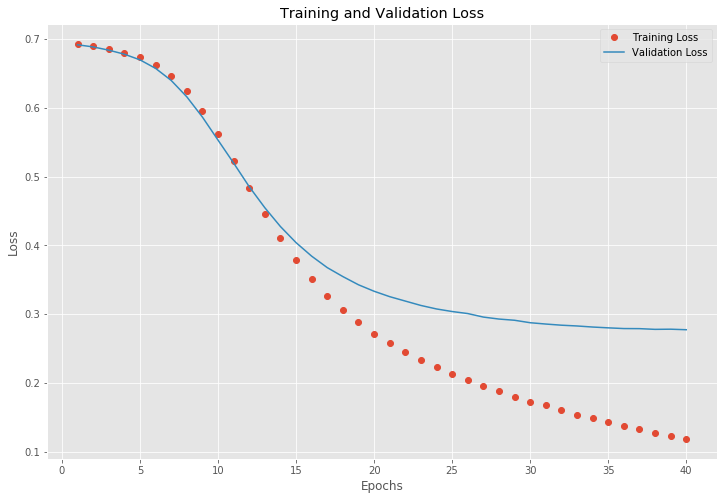

In [22]:
plt.plot(epochs, history['loss'], 'o', label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

None

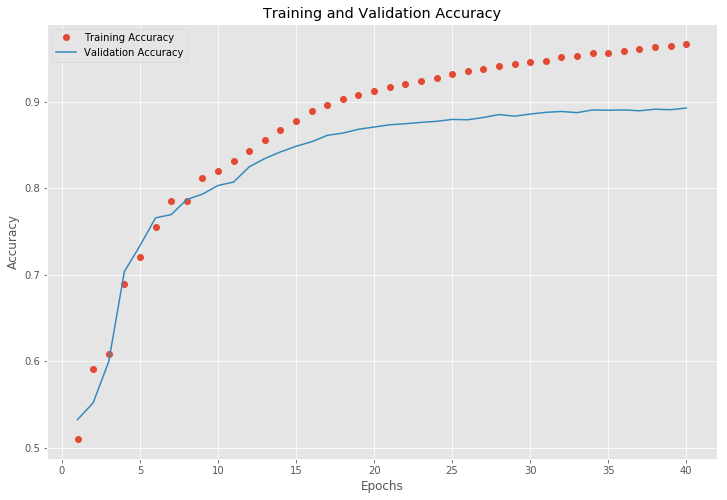

In [23]:
plt.plot(epochs, history['acc'], 'o', label='Training Accuracy')
plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

None

---

In [24]:
decode_review(X_test[0])

"<START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

In [25]:
y_test[0]

0

In [26]:
model.predict_classes([[X_test[0]]])

array([[0]], dtype=int32)

In [27]:
decode_review(X_test[1])

"<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances austen's the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere rife with sexual tension and psychological trickery it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the solemn moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual repression and desperation be patien

In [28]:
y_test[1]

1

In [29]:
model.predict([[X_test[1]]])

array([[0.99983263]], dtype=float32)